### Lista de Exercícios 5
#### Nome: Ciro B Rosa
#### N° USP: 2320769

#### Exercício 4.11

In [1]:
# importa dependências da tarefa
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.linalg import circulant

In [2]:
# versão amostrada da função f
N = 256
ks = np.arange(N)
ts = [k / N for k in ks]
f  = np.zeros(N)

n1 = int(N/2)
f[:n1] = [ np.sin(10 * math.pi * t) for t in ts[:n1] ]
f[n1:] = [ 1/2 for t in ts[n1:] ]


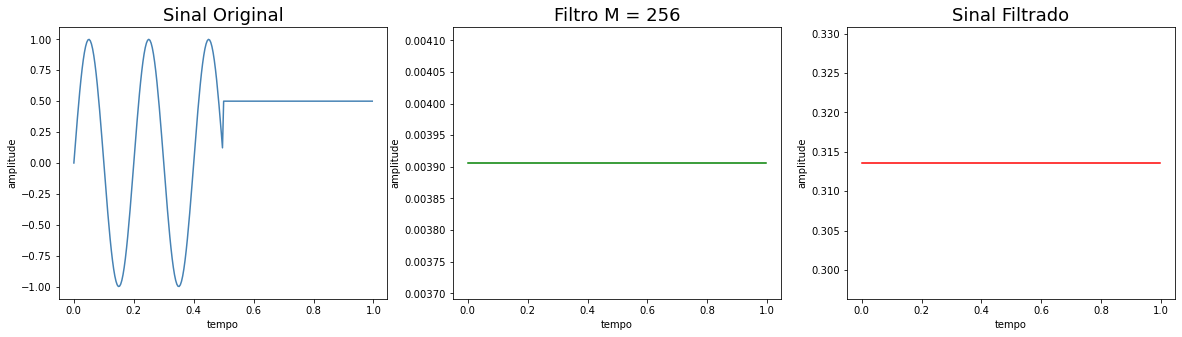

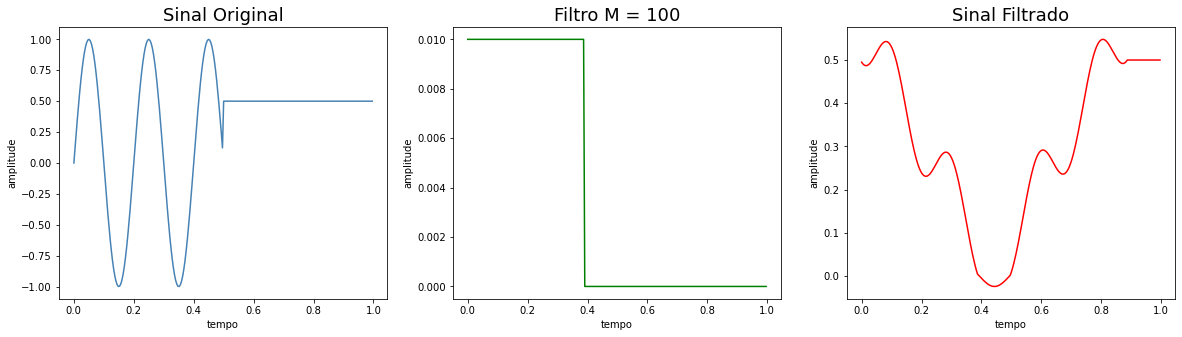

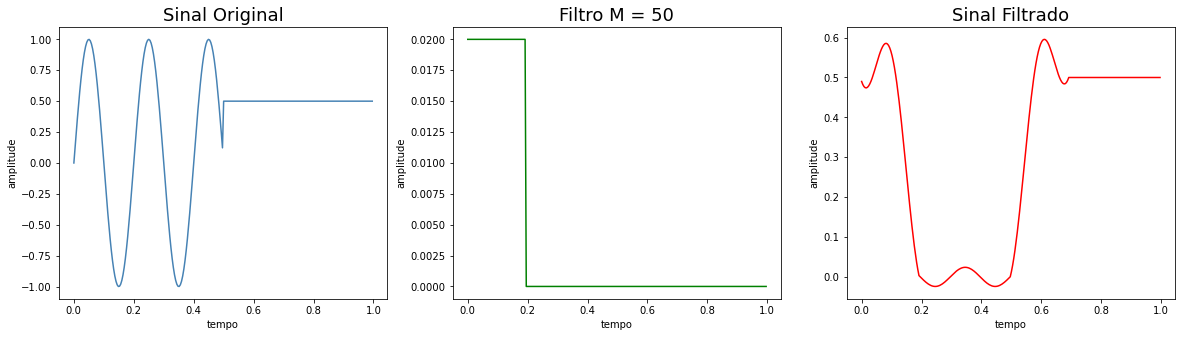

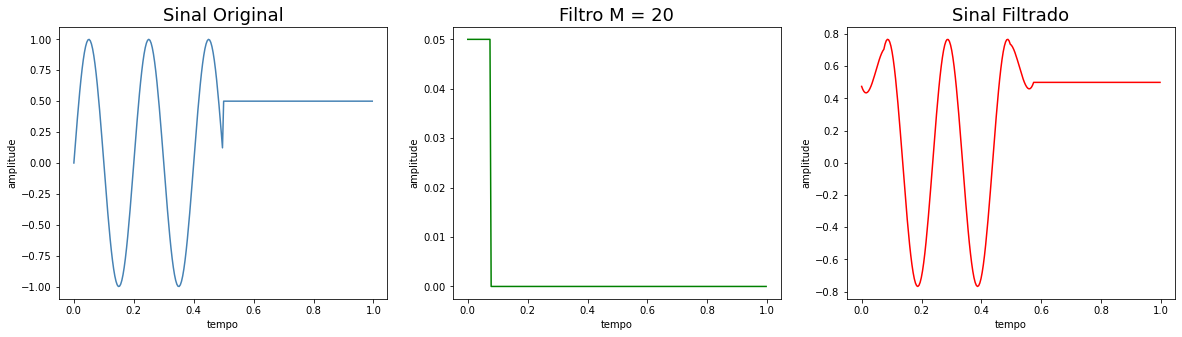

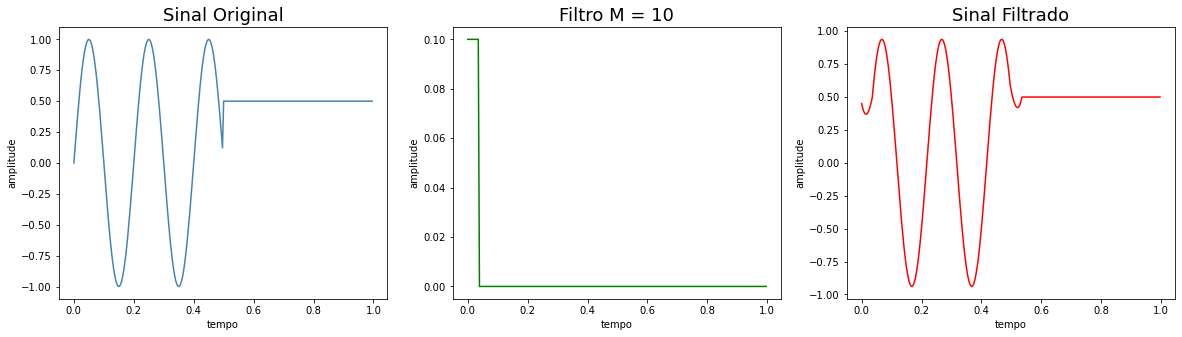

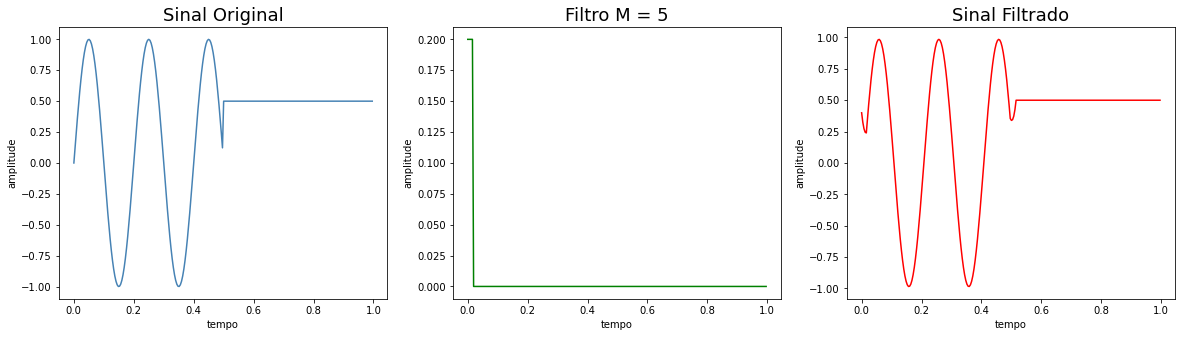

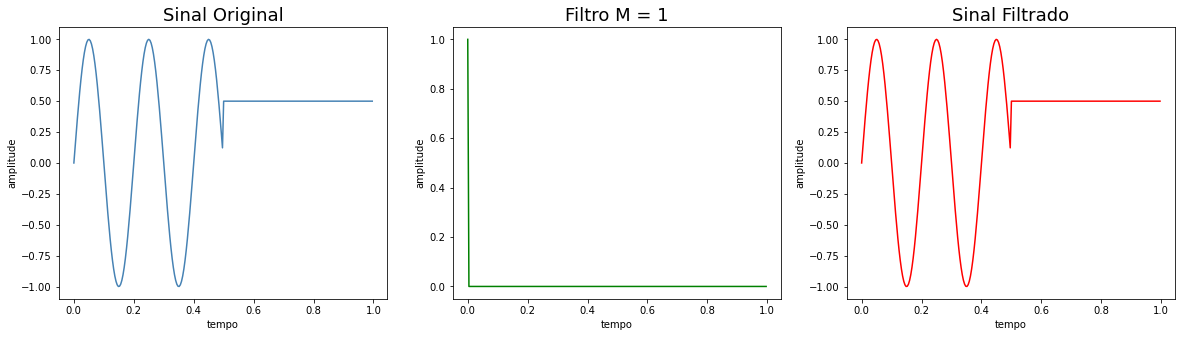

In [3]:
Ms = np.array((256, 100, 50, 20, 10, 5, 1))

for M in Ms:
    # calcular filtro de convolução
    v = np.zeros(N)
    v[:M] = [ 1/M for k in ks[:M] ]
    
    # calcular convolução
    y = np.real( ifft( fft(f) * fft(v) ) )

    # plotar gráficos
    fig, ax = plt.subplots(1,3,figsize=(20,5))

    ax[0].set_title("Sinal Original", fontsize = 18)
    ax[0].set_xlabel("tempo")
    ax[0].set_ylabel("amplitude")
    ax[0].plot(ts, f, color = "steelblue")

    ax[1].set_title("Filtro M = " + str(M), fontsize = 18)
    ax[1].set_xlabel("tempo")
    ax[1].set_ylabel("amplitude")
    ax[1].plot(ts, v, color = "green")

    ax[2].set_title("Sinal Filtrado", fontsize = 18)
    ax[2].set_xlabel("tempo")
    ax[2].set_ylabel("amplitude")
    ax[2].plot(ts, y, color = "red")

    plt.show()

#### Discussão sobre o exercício:

Como a convolução é uma operação comutativa, este aluno entende ser mais conveniente interpretar os resultados ao serem invertidos os papéis de sinal e filtro, ou seja: a análise a seguir toma como "sinal" os pulsos quadrados e como "filtros" as formas de onda "parcialmente senoidais".

Para M=1, temos um sinal de impulso. Conforme a teoria, a resposta ao impulso é dada pela resposta em frequência do próprio filtro/sistema. Por este motivo, a saída apresenta a mesma forma "parcialmente senoidal" sem distorção visível.

À medida que M cresce, o impulso dá lugar a um pulso retangular de duração finita. Para M pequeno, a forma de onda parcialmente senoidal é preservada em sua grande parte, com leves distorções. Este efeito é observado para M entre 5 e 20.

Para Ms a partir de 50, a frequência fundamental do sinal senoidal não é mais reconhecida visualmente. Para Ms iguais a 50 e 100, vale notar que a largura de pulso equivale a, respectivamente, um e dois períodos senoidais.

Para M=256, o sinal original é completamente perdido.

#### Exercício 4.13

In [4]:
N = 4

h = np.array((1, 2-1j, -1j, -1+2j))
print("Vetor não trivial h:", h)

H = fft(h)
print("\nDFT de h...........:", H)

Mh = circulant(h)
print("\nMatriz circulante Mh:\n", Mh)

evl, evc = np.linalg.eig(Mh)
print("\nAutovalores de Mh:\n", evl)
print("\nAutovetores de Mh:\n", evc)


Vetor não trivial h: [ 1.+0.j  2.-1.j -0.-1.j -1.+2.j]

DFT de h...........: [ 2.+0.j -2.-2.j  0.-2.j  4.+4.j]

Matriz circulante Mh:
 [[ 1.+0.j -1.+2.j -0.-1.j  2.-1.j]
 [ 2.-1.j  1.+0.j -1.+2.j -0.-1.j]
 [-0.-1.j  2.-1.j  1.+0.j -1.+2.j]
 [-1.+2.j -0.-1.j  2.-1.j  1.+0.j]]

Autovalores de Mh:
 [ 4.00000000e+00+4.00000000e+00j  2.00000000e+00-7.79795472e-17j
 -2.00000000e+00-2.00000000e+00j  1.96582848e-16-2.00000000e+00j]

Autovetores de Mh:
 [[ 2.22044605e-16+5.00000000e-01j  5.00000000e-01+1.11022302e-16j
  -2.35922393e-16+5.00000000e-01j -5.00000000e-01+4.16333634e-16j]
 [ 5.00000000e-01+0.00000000e+00j  5.00000000e-01-3.88578059e-16j
  -5.00000000e-01-1.66533454e-16j  5.00000000e-01-2.77555756e-17j]
 [ 1.11022302e-16-5.00000000e-01j  5.00000000e-01+0.00000000e+00j
  -1.38777878e-17-5.00000000e-01j -5.00000000e-01+1.11022302e-16j]
 [-5.00000000e-01+3.88578059e-16j  5.00000000e-01-2.77555756e-17j
   5.00000000e-01+0.00000000e+00j  5.00000000e-01+0.00000000e+00j]]


#### Discussão de resultados:

Por inspeção, verifica-se que os autovalores de Mh e a DFT de h (= H) acima, são vetores idênticos a menos de sua ordenação e precisão do zero (1e-16).

A verificação da paridade entre autovalores e autovetores pode ser feita através da verificação da igualdade matricial $M_h.E_{N,k} = H_k.E_{N,k}$ para o range de frequências k onde $ 0 \le k < N $. Esta verificação é feita a seguir.

In [5]:
ks = np.arange(N)
ms = np.arange(N)

for k in ks:
    E = [ (np.exp(1j * 2 * math.pi * k * m/N) ) for m in ms ]
    E = np.array(E)
    
    l = np.dot(Mh, E)
    r = H[k] * E
    assert np.linalg.norm(l-r) < 1e-12
    
    print("Verificado para a frequência k =", k)

Verificado para a frequência k = 0
Verificado para a frequência k = 1
Verificado para a frequência k = 2
Verificado para a frequência k = 3
